## Mount Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# masuk ke folder "kartun_cnn"
% cd /content/drive/MyDrive/kartun_cnn

/content/drive/MyDrive/kartun_cnn


In [ ]:
! ls

deep_learning


## eksplorasi data

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('.'):
  print(f"Ada{len(dirnames)} folder dan ada {len(filenames)} file di dalam {dirpath}")

Ada1 folder dan ada 0 file di dalam .
Ada2 folder dan ada 0 file di dalam ./deep_learning
Ada4 folder dan ada 0 file di dalam ./deep_learning/test
Ada0 folder dan ada 10 file di dalam ./deep_learning/test/spongebob
Ada0 folder dan ada 10 file di dalam ./deep_learning/test/tweety
Ada0 folder dan ada 10 file di dalam ./deep_learning/test/dorami
Ada0 folder dan ada 10 file di dalam ./deep_learning/test/pikachu
Ada4 folder dan ada 0 file di dalam ./deep_learning/train
Ada0 folder dan ada 156 file di dalam ./deep_learning/train/spongebob
Ada0 folder dan ada 145 file di dalam ./deep_learning/train/pikachu
Ada0 folder dan ada 142 file di dalam ./deep_learning/train/dorami
Ada0 folder dan ada 281 file di dalam ./deep_learning/train/tweety


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('deep_learning/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['dorami' 'pikachu' 'spongebob' 'tweety']


In [ ]:
# view image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")
  return img

Image Shape : (822, 580, 3)


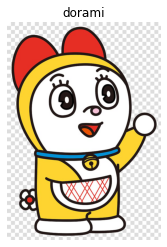

In [ ]:
# img = view_random_image(target_dir='deep_learning/train/',
#                         target_class='pikachu')

# img = view_random_image(target_dir='deep_learning/train/',
#                         target_class='spongebob')

# img = view_random_image(target_dir='deep_learning/train/',
#                         target_class='tweety')

img = view_random_image(target_dir='deep_learning/train/',
                        target_class='dorami')

## Image Data Generator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

# augmented object
train_datagen_augmented = ImageDataGenerator(rescale=1/225.0,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_dir = 'deep_learning/train'
val_dir = 'deep_learning/test'

# Gunakan object datagen (pipeline)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)


valid_data = valid_datagen.flow_from_directory(val_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46,
                                               shuffle=False) #shuffle hanya untuk validation

Found 724 images belonging to 4 classes.
Found 724 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, 3, activation='relu',input_shape=(224,224,3))) #jumlah fitur/sesuaikan data, jika gambar berwarna di tambah angka 3
model.add(MaxPool2D(2)) # Maxpool dengan 2x2 matriks

model.add(Conv2D(32, 3, activation='relu')) #jika gambar berwarna di tambah angka 3
model.add(MaxPool2D(2))

model.add(Conv2D(128, 3, activation='relu')) #jika gambar berwarna di tambah angka 3
model.add(MaxPool2D(2))

# flattend
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax')) # 4 kelas multiclass pakai softmax

# model compile
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

## training data

In [ ]:
# training model

learn = model.fit(train_data,
                  epochs=30,
                  validation_data=valid_data)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
46/46 [==============================] - 266s 6s/step - loss: 1.5134 - accuracy: 0.4254 - val_loss: 1.0471 - val_accuracy: 0.5500
Epoch 2/30
46/46 [==============================] - 10s 217ms/step - loss: 0.8247 - accuracy: 0.6713 - val_loss: 0.7611 - val_accuracy: 0.7000
Epoch 3/30
46/46 [==============================] - 11s 242ms/step - loss: 0.5555 - accuracy: 0.7804 - val_loss: 0.7066 - val_accuracy: 0.7250
Epoch 4/30
46/46 [==============================] - 10s 214ms/step - loss: 0.3453 - accuracy: 0.8729 - val_loss: 0.6834 - val_accuracy: 0.8000
Epoch 5/30
46/46 [==============================] - 10s 215ms/step - loss: 0.1807 - accuracy: 0.9461 - val_loss: 0.6898 - val_accuracy: 0.7750
Epoch 6/30
46/46 [==============================] - 10s 221ms/step - loss: 0.1080 - accuracy: 0.9669 - val_loss: 0.6921 - val_accuracy: 0.7750
Epoch 7/30
46/46 [==============================] - 10s 218ms/step - loss: 0.0923 - accuracy: 0.9738 - val_loss: 0.9228 - val_accuracy: 0.7000
E

In [ ]:
# training model augmented

learn1 = model.fit(train_datagen_augmented,
                  epochs=30,
                  validation_data=valid_data)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
46/46 [==============================] - 18s 373ms/step - loss: 1.6416 - accuracy: 0.3992 - val_loss: 1.3235 - val_accuracy: 0.3000
Epoch 2/30
46/46 [==============================] - 17s 368ms/step - loss: 1.2348 - accuracy: 0.4613 - val_loss: 1.1373 - val_accuracy: 0.5000
Epoch 3/30
46/46 [==============================] - 18s 393ms/step - loss: 1.1670 - accuracy: 0.4945 - val_loss: 1.1193 - val_accuracy: 0.5000
Epoch 4/30
46/46 [==============================] - 17s 364ms/step - loss: 1.1114 - accuracy: 0.5387 - val_loss: 0.9467 - val_accuracy: 0.6750
Epoch 5/30
46/46 [==============================] - 18s 383ms/step - loss: 1.0326 - accuracy: 0.5994 - val_loss: 0.9338 - val_accuracy: 0.6750
Epoch 6/30
46/46 [==============================] - 18s 394ms/step - loss: 0.9596 - accuracy: 0.6022 - val_loss: 0.9416 - val_accuracy: 0.6000
Epoch 7/30
46/46 [==============================] - 18s 396ms/step - loss: 0.9143 - accuracy: 0.6160 - val_loss: 0.8161 - val_accuracy: 0.6250

## model Evaluation

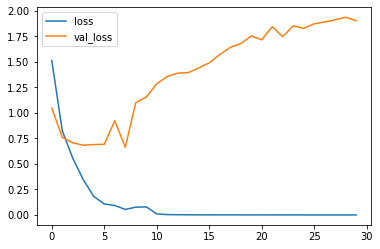

In [ ]:
import pandas as pd

metrics = pd.DataFrame(learn.history)
metrics[["loss","val_loss"]].plot()

Augmentes Dataset


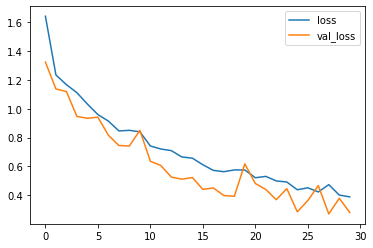

In [ ]:
print("Augmentes Dataset")
metrics = pd.DataFrame(learn1.history)
metrics[["loss","val_loss"]].plot()

In [ ]:
from sklearn.metrics import classification_report

res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test,res))


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.27      0.30      0.29        10
           1       0.17      0.20      0.18        10
           2       0.14      0.10      0.12        10
           3       0.50      0.50      0.50        10

    accuracy                           0.28        40
   macro avg       0.27      0.28      0.27        40
weighted avg       0.27      0.28      0.27        40



## Model Improvement

improvment itu tidak harus modelnya yang diganti-ganti, tapi juga bisa memodifikasi datanya menggunakan augmented

Augmented Effect

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

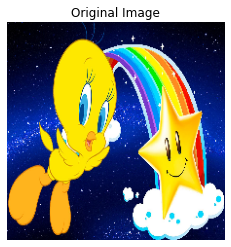

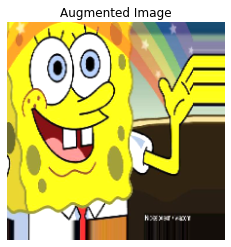

<Figure size 432x288 with 0 Axes>

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_datagen_augmented.next()
random_number = random.randint(0,15)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)
plt.figure()

## tranfer learning

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

base_model = ResNet50V2(input_shape=(224, 224, 3),
                        include_top=False,
                        weights="imagenet")

# freeze model
base_model.trainble = False

94683136/94668760 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model_ft = Sequential()
model_ft.add(base_model)
model_ft.add(GlobalAveragePooling2D())
model_ft.add(Dropout(0.2))
model_ft.add(Dense(15, activation='relu'))
model_ft.add(Dense(4, activation='softmax'))

# model compile
model_ft.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_ft.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 15)                30735     
                                                                 
 dense_7 (Dense)             (None, 4)                 64        
                                                                 
Total params: 23,595,599
Trainable params: 23,550,159
Non-trainable params: 45,440
_____________________________________

In [ ]:
# training model augmented

learn2 = model_ft.fit(train_datagen_augmented,
                  epochs=30,
                  validation_data=valid_data)

Epoch 1/30
 3/46 [>.............................] - ETA: 11s - loss: 1.2539 - accuracy: 0.4583

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/46 [==============================] - 29s 463ms/step - loss: 0.9317 - accuracy: 0.6851 - val_loss: 7846.0845 - val_accuracy: 0.2500
Epoch 2/30
46/46 [==============================] - 19s 416ms/step - loss: 0.8758 - accuracy: 0.6409 - val_loss: 377718.4375 - val_accuracy: 0.2500
Epoch 3/30
46/46 [==============================] - 20s 426ms/step - loss: 0.7049 - accuracy: 0.7583 - val_loss: 67.6418 - val_accuracy: 0.3500
Epoch 4/30
46/46 [==============================] - 19s 415ms/step - loss: 0.6906 - accuracy: 0.7845 - val_loss: 256.4049 - val_accuracy: 0.2500
Epoch 5/30
46/46 [==============================] - 20s 427ms/step - loss: 0.6273 - accuracy: 0.8163 - val_loss: 23.4191 - val_accuracy: 0.5000
Epoch 6/30
46/46 [==============================] - 19s 422ms/step - loss: 0.5229 - accuracy: 0.8218 - val_loss: 3.9678 - val_accuracy: 0.4000
Epoch 7/30
46/46 [==============================] - 20s 445ms/step - loss: 0.3271 - accuracy: 0.9033 - val_loss: 8.3419 - val_accuracy: 0.500

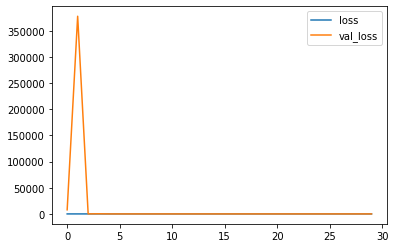

In [ ]:
metrics = pd.DataFrame(learn2.history)
metrics[["loss","val_loss"]].plot()